# Ladder of powers

Transformations using a **ladder of powers** are used when performing empirical modeling. The idea is to find a transformation that successfully linearizes data. If the data are linear under a certain transformation, then the model will be a good empirical description of the behavior of the data set on that domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from linear_fitting_functions import least_squares_optimizer_fit_linear 

## Example 3 (Example 1 redux)

Using the same data as in example 1, let's see what happens when we perform a transformation in $x$ instead of $y$. The advantage of this is that we don't have to "return to the original variables" at the end, because we won't do anything to $y$. The disadvantage is that we will change the spacing of the data in the $x$ direction.

In [2]:
x1 = [0.0, 0.0625, 0.125, 
      0.1875, 0.25, 0.3125, 
      0.375, 0.4375, 0.5, 
      0.5625, 0.625, 0.6875, 
      0.75, 0.8125, 0.875, 
      0.9375, 1.0]
y1 = [0.054, 0.014, 0.023, 
      0.021, 0.032, 0.023, 
      0.025, 0.070, 0.035, 
      0.110, 0.128, 0.130, 
      0.173, 0.183, 0.211, 
      0.283, 0.304]
n1 = len(x1)

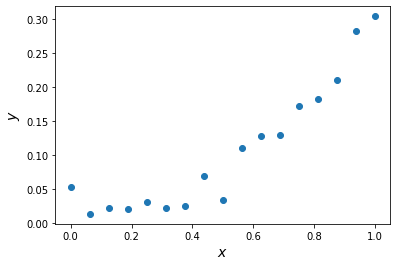

In [3]:
plt.plot(x1,y1,'o');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y$', fontsize=14);

### Perform a replacement in $x$ instead of $y$

Before, we used the transformations

$$ \sqrt{y} = ax + b $$

and

$$ \ln y = ax + b $$

Both of these worked fine. The first resulted in a quadratic model, the second in an exponential model.

**"Stretch" the data out in the $x$ direction.** We could also think of stretching out the x values of this data set and looking at it from that perspective

Replace $x\to x^2$ 

We would then propose the model 

$$ y = ax^2 + b $$

and if it looks linear, then this would be a good model too. It probably will be, as we already saw that the similar transformation in $y \to \sqrt{y}$ resulted in a good fit to data.

In [4]:
x1_2 = np.power(x1, 2.0)

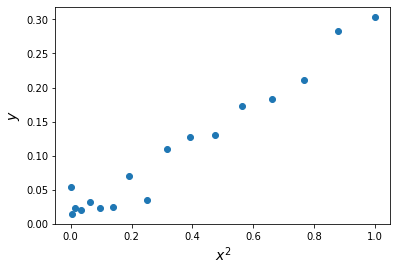

In [5]:
plt.plot(x1_2,y1,'o');
plt.xlabel('$x^2$', fontsize=14);
plt.ylabel('$y$', fontsize=14);

See how that stretches out the spacing of the x points? It also looks fairly linear, which is interesting. Let's use least-squares to determine the slope and intercept of this plot, assuming this is a straight-line relationship.

After 3 iterations...
The optimization was successful! Here are the values it found:
       m =     0.2830
       b =     0.0097
The sum of squared deviations is 0.0065
And in case you need to know...
The largest absolute error is r = 0.0455 
 It occurs when x =  0.2500


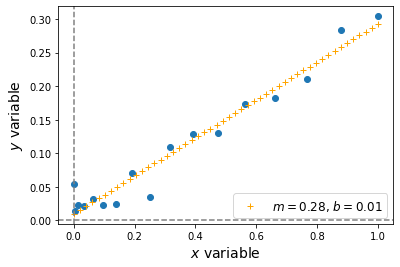

In [6]:
n1pred = 50
# be careful setting up the prediction array, this is x^2 not x
# when you plot y vs. x at the end you will probably need another
# prediction array
x1_2_pred = np.linspace(0, 1,num=n1pred) 
least_squares_optimizer_fit_linear(x1_2, y1, 0.3, 0, 
                                   x1_2_pred, display_table=False)

We obtain a slope $a=0.2830$ and an intercept $b=0.0097$. That means the empirical model is

$$ y = 0.2830 x^2 + 0.0097 $$

There is no need to "solve for the original variables" here, because we have $y = f(x)$.

Let's make predictions in the original variables now.

In [7]:
x1pred = np.linspace(-0.1,1.1,num=n1pred)
y1pred = np.empty(n1pred)
a_result = 0.2830
b_result = 0.0097
for i in range(0, n1pred):
    y1pred[i] = a_result * x1pred[i]**2.0 + b_result

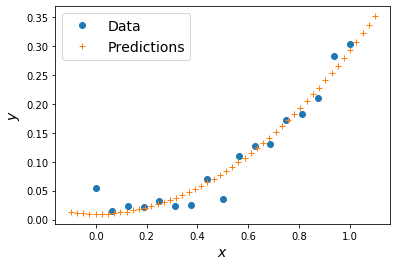

In [8]:
plt.plot(x1,y1,'o', label='Data');
plt.plot(x1pred, y1pred, '+', label='Predictions');
plt.xlabel('$x$', fontsize=14);
plt.ylabel('$y$', fontsize=14);
plt.legend(fontsize=14);

This looks pretty much as good as our old result taking $y \to \sqrt{y}$. They both result in slightly different quadratic functions

#### Example 1 model a

$$ \sqrt{y} = 0.4215 x + 0.0848 $$

which, if you multiply out the binomial, is

$$ y = 0.1777 x^2 + 0.0715 x + 0.0072 $$

#### Example 3 quadratic model

In this analysis we got 

$$ y = 0.2830 x^2 + 0.0097 $$

So both are quadratics, but they are not the same quadratic functions.

# Lab quiz: working with negative powers of $y$

Let's look at a different kind of transformation, where we have a decreasing instead of increasing function. Read through the following cells for this data set:

In [9]:
x2 = [1.000,1.286,1.571,1.857,
      2.143,2.429,2.714,3.000,
      3.286,3.571,3.857,4.143,
      4.429,4.714,5.000]
y2 = [2.100,1.426,0.899,0.790,
      0.684,0.474,0.467,0.393,
      0.336,0.283,0.296,0.327,
      0.142,0.273,0.196]
n2= len(x2)

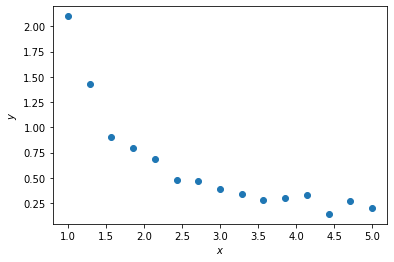

In [10]:
plt.plot(x2, y2, 'o');
plt.xlabel('$x$');
plt.ylabel('$y$');

When we have decreasing functions, we usually want to enhance the smaller $y$ values at higher $x$. Good candidates for this are inverse powers in the ladder of powers like $z^{-1/2}$ and $z^{-1}$ and so on.

Let's try a replacement $y \to y^{-1}$ and see what happens

In [11]:
y2_m1 = np.power(y2,-1.0)

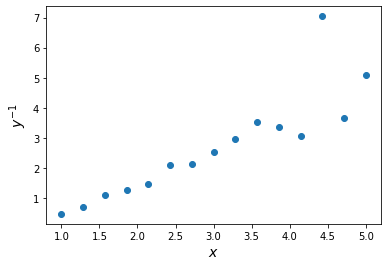

In [15]:
plt.plot(x2,y2_m1,'o');
plt.xlabel(r'$x$', fontsize=14);
plt.ylabel(r'$y^{-1}$', fontsize=14);

A problem that can occur with such a transformation is that it changes the original decreasing data into increasing data. We solve this by instead including a minus sign in the ladder of powers transformation $y \to -\frac1y$

## Lab quiz activity

Using the above data and transformation, transform the data and compute the coefficient values for the linearized model $a$ and $b$. I.e.,

$$ -\frac{1}{y} = ax +b $$

and find the coefficients using `least_squares_optimizer_fit_linear`.

Once you have done this, plot the predictions from the model in terms of the original variables. 

Then compute the absolute error and percent error for the model you developed. For the quiz that you will submit, find

- the largest absolute error and state at which value of $x$ it occurs
- the largest percent error and state at which value of $x$ it occurs